(c) 2020, Franz Ludwig Kostelezky, IMTEK chair of simulation, \<info@kostelezky.com\>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import simulated data
data_simulated = pd.read_csv('./ECG_data/SimulatedECG.txt', sep=" ", header=1)
data_simulated.columns = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']

In [3]:
# import measured data
data_measured = pd.read_csv('./ECG_data/MeasuredECG.txt', sep=" ", header=1)
data_measured.columns = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']

<IPython.core.display.Javascript object>


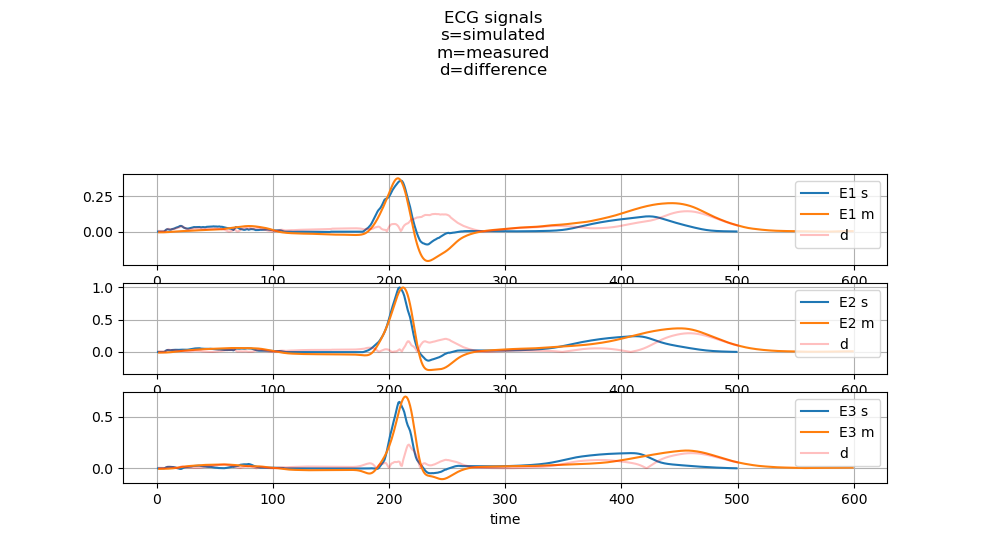

In [4]:
%matplotlib notebook
#fig = plt.figure(figsize=(8.5, 10.5))
fig = plt.figure()
fig.suptitle('ECG signals\ns=simulated\nm=measured\nd=difference')

header = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']
#l = len(header)
l = 4
for i in range(l):
    if header[i] == 'time': continue

    fig.add_subplot(l, 1, i + 1)
    plt.plot(data_simulated['time'], data_simulated[header[i]], label=header[i] + ' s')
    plt.plot(data_measured['time'], data_measured[header[i]], label=header[i] + ' m')
    plt.plot(data_measured['time'], abs(data_simulated[header[i]] - data_measured[header[i]]), c='r', alpha=.25, label='d')
    plt.grid()
    plt.legend(loc='upper right')

plt.xlabel('time')
plt.show()

# Fourier analysis of channels time series

<IPython.core.display.Javascript object>


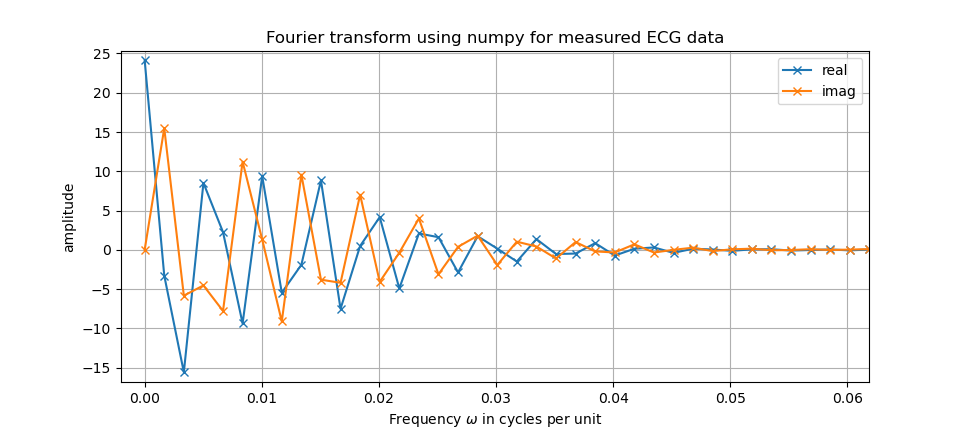

In [5]:
%matplotlib notebook
t = data_measured['time']

sp = np.fft.rfft(data_measured['E1'])
freq = np.fft.rfftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag, marker='x')

plt.title('Fourier transform using numpy for measured ECG data')
plt.ylabel('amplitude')
plt.xlabel('Frequency $\omega$ in cycles per unit')
plt.legend(('real', 'imag'))
plt.grid()
plt.show()

In [8]:
T = len(data_measured['time'])
l = np.linspace(0, T, T)

o = []
for t in l:
    tmp = 0
    for i in range(T // 2):
        omega = i * 2 * np.pi / T
        tmp += 2 * np.sum(sp.real[i] * np.cos(omega * t) - sp.imag[i] * np.sin(omega * t))
    o.append(tmp)

<IPython.core.display.Javascript object>


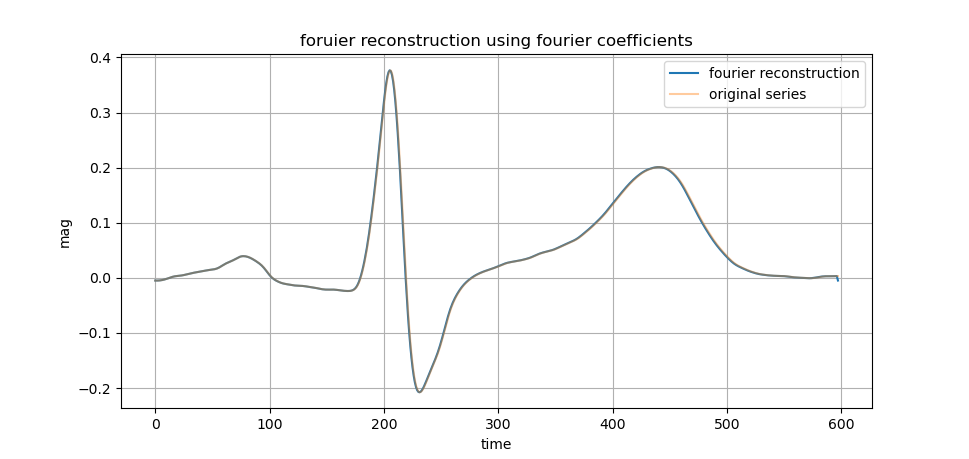

In [14]:
%matplotlib notebook
    
plt.plot(np.array(o)/T - np.mean(data_measured['E1']), label='fourier reconstruction')
plt.plot(data_measured['E1'], alpha=.4, label='original series')
plt.xlabel('time')
plt.ylabel('mag')
plt.grid()
plt.title('foruier reconstruction using fourier coefficients')
plt.legend()
plt.show()